# Machine Learning Classification

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Data after PP/Data')

In [3]:
dataset = dataset.drop(['Unnamed: 0'],axis=1)

In [4]:
dataset

,mu1,lam1,mu2,sigma,mu3,sigma3,w1,w2,w3,n_spikes,Target
0,0.099999,0.010000,1.376800e-01,0.069408,0.368091,0.172628,0.286221,4.179009e-01,2.958779e-01,1015.0,0.0
1,0.019293,0.019831,6.633874e-02,0.000100,0.100001,0.000520,1.000000,1.192093e-07,1.421085e-14,10364.0,0.0
2,0.043575,0.029764,1.779872e-01,0.000100,0.100064,0.000260,1.000000,1.192093e-07,1.421085e-14,4589.0,0.0
3,0.024164,0.022119,6.418069e-02,0.000100,0.100010,0.000718,1.000000,1.192093e-07,1.421085e-14,8274.0,0.0
4,0.048184,0.030814,4.696582e-03,0.000100,0.100139,0.000218,1.000000,1.192093e-07,1.421085e-14,4151.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
543,0.100000,0.011880,1.038845e-01,0.058294,0.483309,0.271518,0.332834,4.549999e-01,2.121657e-01,1029.0,1.0
544,0.018542,0.018771,1.807094e-01,0.000100,0.100000,0.000106,1.000000,1.192093e-07,1.421085e-14,10784.0,1.0
545,0.099969,0.039687,9.343772e-02,0.040354,0.267501,0.112234,0.630343,2.080073e-01,1.616492e-01,1523.0,1.0
546,0.056240,0.031443,1.643654e-07,0.000100,0.100001,0.000100,1.000000,1.192093e-07,1.421085e-14,3555.0,1.0


In [5]:
dataset['Target'].value_counts()

0.0    317
1.0    231
Name: Target, dtype: int64

## Train test split

In [6]:
X = dataset.drop(['Target'],axis=1)
y= dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

## Standardization

In [7]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Comparison

In [8]:
cv = StratifiedKFold(4)

## 1) Decision Tree Classifier

In [9]:
params = {'max_depth':np.linspace(2,10,dtype='int'),'criterion':['gini','entropy']}

clf = DecisionTreeClassifier(random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

In [10]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)



Best parameters set found : {'criterion': 'entropy', 'max_depth': 4} 

Classification report on Test set

Accuracy:  0.912
Recall:  0.931
Precision:  0.871
ROC AUC:  0.915


## 2) Logistic Regression

In [11]:
params = {'C':np.logspace(-3,3,50),'penalty':['l1','l2','elasticnet']}

clf = LogisticRegression(solver='liblinear',random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

In [12]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)



Best parameters set found : {'C': 0.21209508879201905, 'penalty': 'l1'} 

Classification report on Test set

Accuracy:  0.825
Recall:  0.655
Precision:  0.905
ROC AUC:  0.802


## 3) Support Vector Machines

In [13]:
params = {'C':np.logspace(-3,3,50),'kernel':['linear','rbf']}

clf = SVC(random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

In [14]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)



Best parameters set found : {'C': 8.286427728546842, 'kernel': 'rbf'} 

Classification report on Test set

Accuracy:  0.927
Recall:  0.931
Precision:  0.9
ROC AUC:  0.928


In [15]:
svm_model = gs

## 4) Random Forest

In [16]:
params = {'n_estimators':np.linspace(10,150,dtype='int',num=10),'max_depth':np.linspace(2,5,dtype='int'),'criterion':['gini','entropy']}

clf = RandomForestClassifier(n_jobs=-1,random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,verbose=10,n_jobs=-1)

gs=gs.fit(X_train,y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0779s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 388 ta

In [17]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Best parameters set found : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 134} 

Classification report on Test set

Accuracy:  0.912
Recall:  0.914
Precision:  0.883
ROC AUC:  0.913


## 5) Neural Net

In [18]:
X_train.shape

(411, 10)

In [19]:
import torch
print(torch.cuda.is_available())


ModuleNotFoundError: No module named 'torch'

In [20]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            20, activation="relu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 7,421
Trainable params: 7,421
Non-trainable params: 0
______________________________________________________

In [21]:
metrics = [
    'accuracy',
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)



history=model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=200,
    validation_data=(X_test, y_test),

)

Epoch 1/200
42/42 [==============================] - 1s 22ms/step - loss: 0.5206 - accuracy: 0.7591 - fn: 62.0000 - fp: 37.0000 - tn: 201.0000 - tp: 111.0000 - precision: 0.7500 - recall: 0.6416 - val_loss: 0.4291 - val_accuracy: 0.7956 - val_fn: 15.0000 - val_fp: 13.0000 - val_tn: 66.0000 - val_tp: 43.0000 - val_precision: 0.7679 - val_recall: 0.7414
Epoch 2/200
42/42 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8540 - fn: 24.0000 - fp: 36.0000 - tn: 202.0000 - tp: 149.0000 - precision: 0.8054 - recall: 0.8613 - val_loss: 0.3077 - val_accuracy: 0.8832 - val_fn: 8.0000 - val_fp: 8.0000 - val_tn: 71.0000 - val_tp: 50.0000 - val_precision: 0.8621 - val_recall: 0.8621
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8613 - fn: 26.0000 - fp: 31.0000 - tn: 207.0000 - tp: 147.0000 - precision: 0.8258 - recall: 0.8497 - val_loss: 0.3050 - val_accuracy: 0.8759 - val_fn: 9.0000 - val_fp: 8.0000 - val_tn: 71.0000 - val_t

dict_keys(['loss', 'accuracy', 'fn', 'fp', 'tn', 'tp', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_fn', 'val_fp', 'val_tn', 'val_tp', 'val_precision', 'val_recall'])


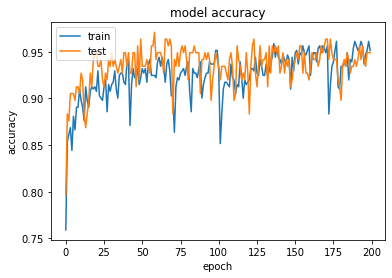

In [22]:
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [23]:
y_true, y_pred = y_test, model.predict_classes(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy:  0.949
Recall:  0.931
Precision:  0.947
ROC AUC:  0.947


## Feature importance

In [24]:
X.columns

Index(['mu1', 'lam1', 'mu2', 'sigma', 'mu3', 'sigma3', 'w1', 'w2', 'w3',
       'n_spikes'],
      dtype='object')

In [25]:
result = permutation_importance(svm_model, X_train, y_train, 
                           n_repeats=30,
                           random_state=0)

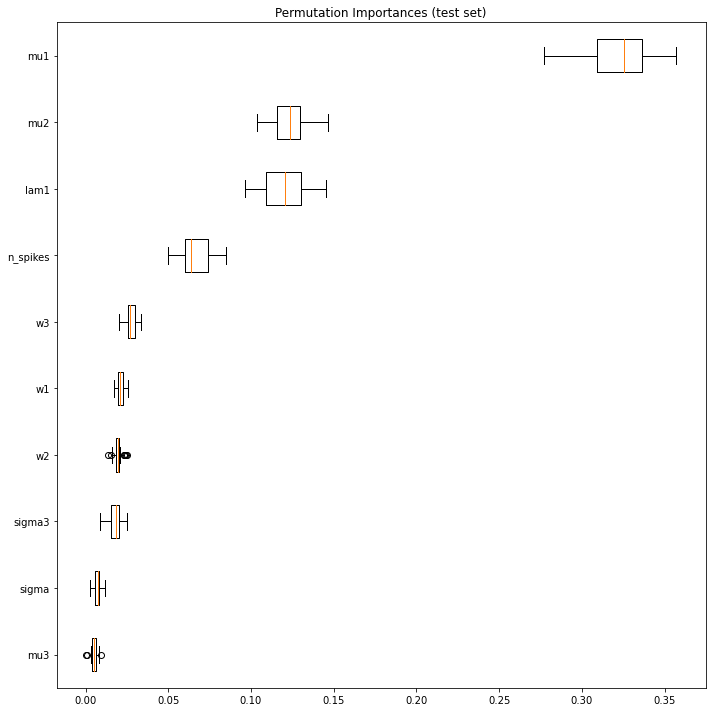

In [26]:
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

# Classification with Nets after KA stimulation

In [34]:
from scipy import stats

In [35]:
dataset_after = pd.read_csv('Data after PP/DataAfter')

In [36]:
dataset_after = dataset_after.drop(['Unnamed: 0'],axis=1)

In [37]:
print('Target LRRK2 vs Healthy\n',dataset_after['Target'].value_counts())
print('Stimulated LRRK2 vs Healthy\n',dataset_after['Stimulation'].value_counts())

Target LRRK2 vs Healthy
 0.0    176
1.0    166
Name: Target, dtype: int64
Stimulated LRRK2 vs Healthy
 0.0    177
1.0    165
Name: Stimulation, dtype: int64


In [66]:
def plot_boxplot(target,column,dataset,dataset_after):
    x_list_param_boxplot=[]
    y_list_param_boxplot=[]


    y_list_param_boxplot.extend(dataset[dataset['Target']==target][column].values)
    len1 = dataset[dataset['Target']==target][column].values.shape[0]
    y_list_param_boxplot.extend(dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==0)][column].values)
    len2 = dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==0)][column].values.shape[0]
    y_list_param_boxplot.extend(dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==1)][column].values)
    len3 = dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==1)][column].values.shape[0]

    strs1 = ["Baseline" for x in range(len1)]
    strs2 = ["Stimulated" for x in range(len2)]
    strs3 = ["Control" for x in range(len3)]

    x_list_param_boxplot.extend(strs1)
    x_list_param_boxplot.extend(strs2)
    x_list_param_boxplot.extend(strs3)
    
    plt.figure(figsize=(5,5))
    
    if target==0:
        title = 'Healthy - '+column
    else:
        title = 'LRRK2 - '+column
    plt.title(title)
    sns.boxplot(x_list_param_boxplot,y_list_param_boxplot)
    
    #return y_list_param_boxplot
    stat,p_original=stats.shapiro(y_list_param_boxplot[:len1])
    stat,p=stats.shapiro(y_list_param_boxplot[len1:len1+len2])
    if (p>0.05) and (p_original>0.05):
        stat,t =stats.mannwhitneyu(y_list_param_boxplot[:len1],y_list_param_boxplot[len1:len1+len2],alternative='two-sided')
        print('Stimulation: ',t)
    else:
        stat,t =stats.ttest_ind(y_list_param_boxplot[:len1],y_list_param_boxplot[len1:len1+len2])
        print('Stimulation: ',t)
        
    stat,p=stats.shapiro(y_list_param_boxplot[len1+len2:])
    if (p>0.05) and (p_original>0.05):
        stat,t =stats.mannwhitneyu(y_list_param_boxplot[:len1],y_list_param_boxplot[len1+len2:],alternative='two-sided')
        print('Control: ',t)
    else:
        stat,t =stats.ttest_ind(y_list_param_boxplot[:len1],y_list_param_boxplot[len1+len2:])
        print('Control: ',t)
    
    

mu1
Healthy
Stimulation:  0.02082922589477501
Control:  0.0033996867836613566
LRRK2
Stimulation:  8.793783190091203e-05
Control:  0.4937893486786544



lam1
Healthy
Stimulation:  0.17824482367731684
Control:  0.005913487964413531
LRRK2
Stimulation:  6.570341774232882e-06
Control:  0.9212421685898304



mu2
Healthy
Stimulation:  0.09829923655899435
Control:  0.0037174448055440974
LRRK2
Stimulation:  0.29207628422747817
Control:  0.17523658903012715



sigma
Healthy
Stimulation:  0.06032951474395615
Control:  0.48332153887270424
LRRK2
Stimulation:  0.03139484685495524
Control:  0.6189784559724119



mu3
Healthy
Stimulation:  0.04440028475895933
Control:  0.10031378990101998
LRRK2
Stimulation:  3.198823998328054e-06
Control:  0.24592105820676097



sigma3
Healthy
Stimulation:  0.2704032340489211
Control:  0.14071142685502847
LRRK2
Stimulation:  2.7393039174885673e-05
Control:  0.846893240538684



w1
Healthy
Stimulation:  0.015817644418683427
Control:  0.554023305698465
LRRK2
Stimulation:

<ipython-input-66-d39f9d7ab875>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))
/home/riccardo_levi_25_gmail_com/anaconda3/envs/tesi_neuro/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


ValueError: All numbers are identical in mannwhitneyu

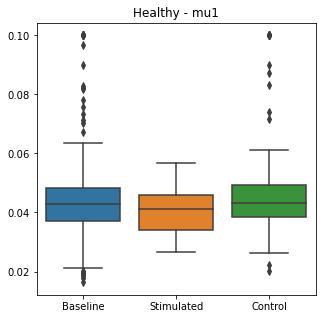

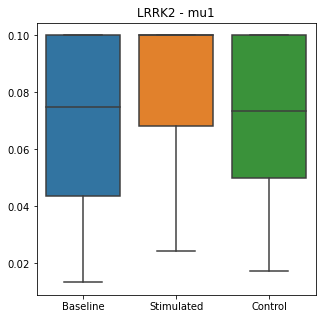

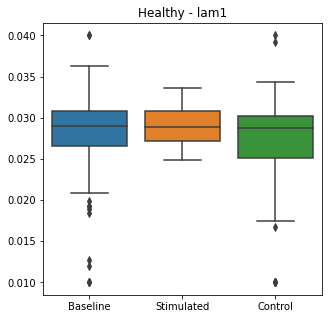

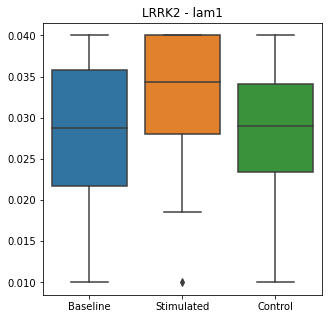

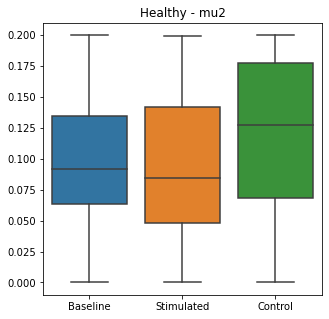

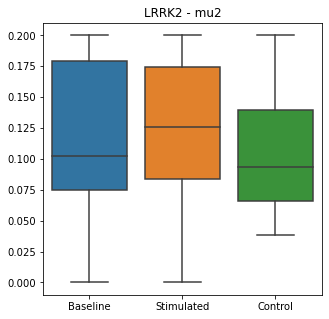

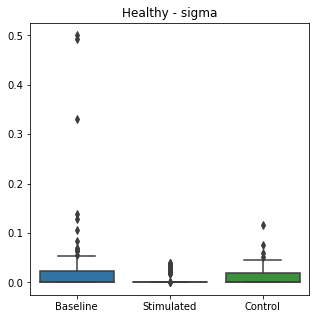

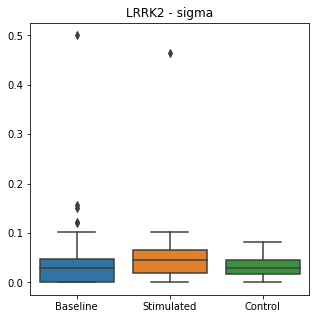

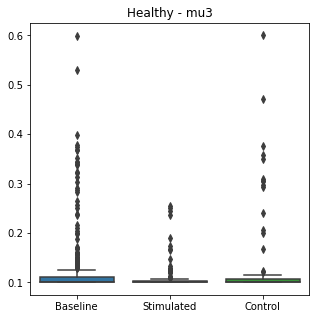

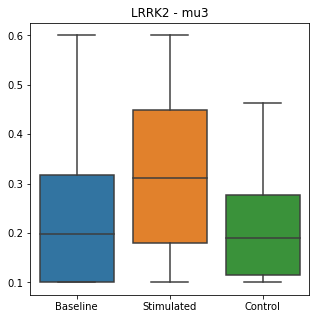

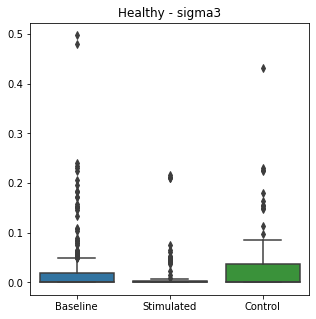

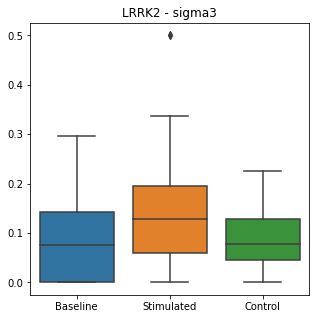

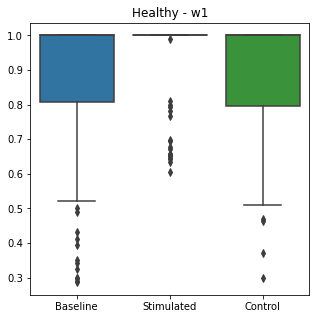

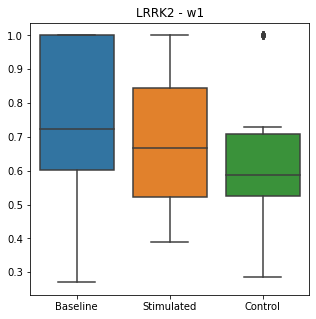

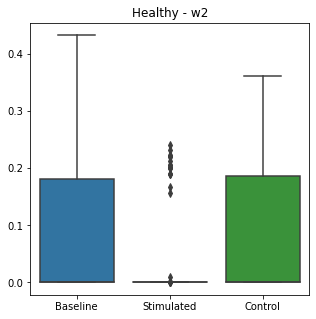

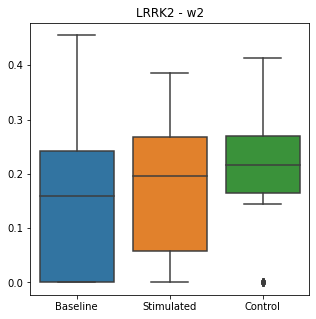

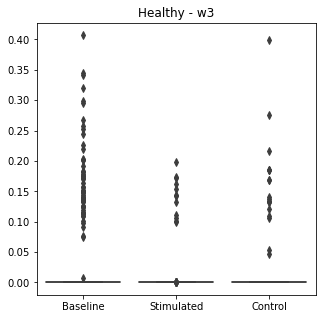

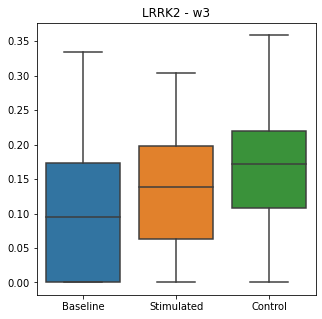

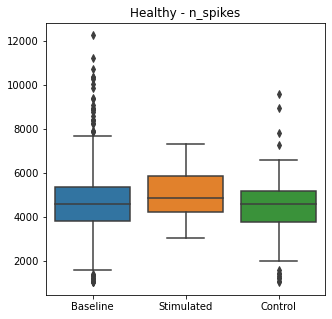

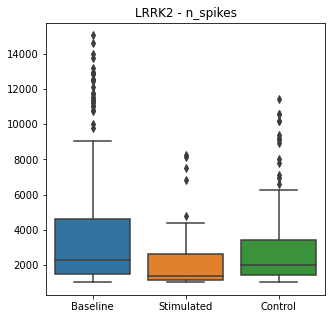

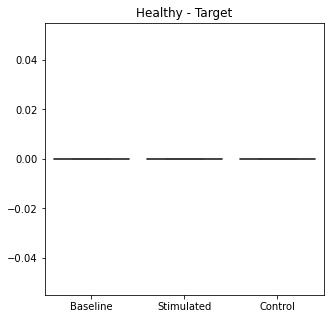

In [67]:
for col in dataset_after.columns.tolist():
    print(col)
    print('Healthy')
    t = plot_boxplot(0,col,dataset,dataset_after)
    print('LRRK2')
    t = plot_boxplot(1,col,dataset,dataset_after)
    print('\n\n')

# Unsupervised learning

In [67]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics

In [68]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [82]:
X = dataset_after.drop(['Target','Stimulation'],axis=1)

target = dataset_after['Target']
stim = dataset_after['Stimulation']

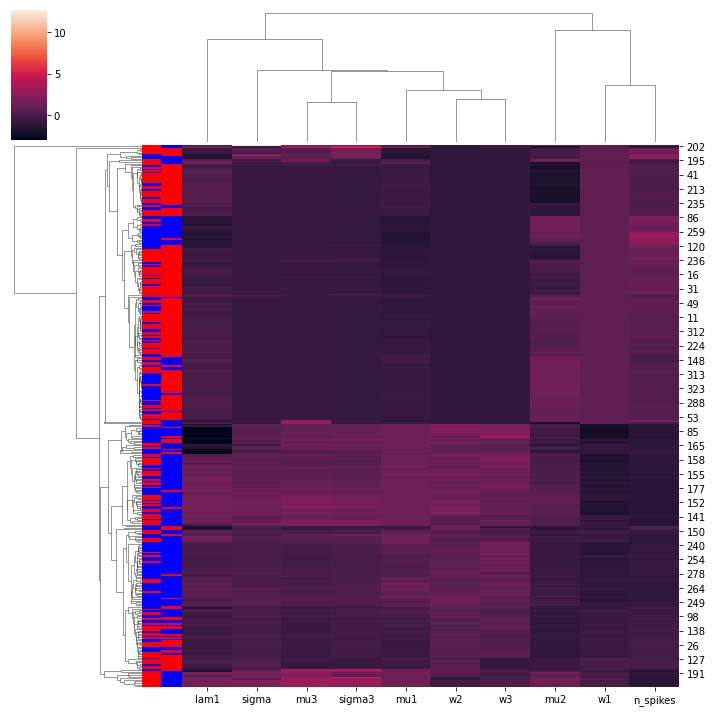

In [94]:
col = X.columns.tolist()
X = StandardScaler().fit_transform(X)


lut = dict(zip(stim.unique(), "rbg"))
row_colors_stim = stim.map(lut)
lut = dict(zip(target.unique(), "rbg"))
row_colors_target = target.map(lut)

row_colors=[row_colors_stim,row_colors_target]
X = pd.DataFrame(X,columns=col)
g = sns.clustermap(X,row_colors=row_colors,
                  method = 'centroid',
                  metric='euclidean')

In [96]:
dataset_after.loc[0]['Target']

0.0

# Multilabel classification

In [101]:
dataset_after = pd.read_csv('Data after PP/DataAfter')
dataset_after = dataset_after.drop(['Unnamed: 0'],axis=1)

In [102]:
list_ml=[]
for i in dataset_after.index:
    if dataset_after.loc[i]['Target']==0 and dataset_after.loc[i]['Stimulation']==0:
        list_ml.append(0)
    elif dataset_after.loc[i]['Target']==1 and dataset_after.loc[i]['Stimulation']==0:
        list_ml.append(1)
    elif dataset_after.loc[i]['Target']==0 and dataset_after.loc[i]['Stimulation']==1:
        list_ml.append(2)
    else :
        list_ml.append(3)

In [103]:
dataset_after['MultiLabel Target']=list_ml

In [104]:
dataset_after['MultiLabel Target'].value_counts()

0    100
3     89
1     77
2     76
Name: MultiLabel Target, dtype: int64

In [106]:
X = dataset_after.drop(['Target','Stimulation','MultiLabel Target'],axis=1)
y= dataset_after['MultiLabel Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

## Standardization

In [107]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Comparison

In [108]:
cv = StratifiedKFold(4)

## 1) Decision Tree Classifier

Classification report on Test set

Accuracy:  0.616
Recall:  0.616
Precision:  0.614


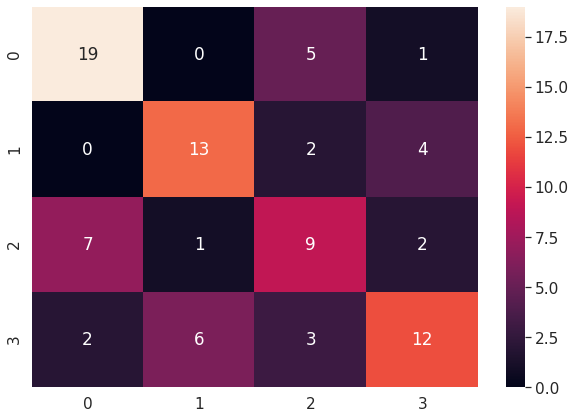

In [131]:
print("Classification report on Test set\n")
gs = DecisionTreeClassifier(max_depth=7,random_state=12)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
#print('ROC AUC: ',roc_auc)
cm=metrics.confusion_matrix(y_true,y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm,annot=True)


## 2) Logistic Regression

Classification report on Test set

Accuracy:  0.628
Recall:  0.628
Precision:  0.628


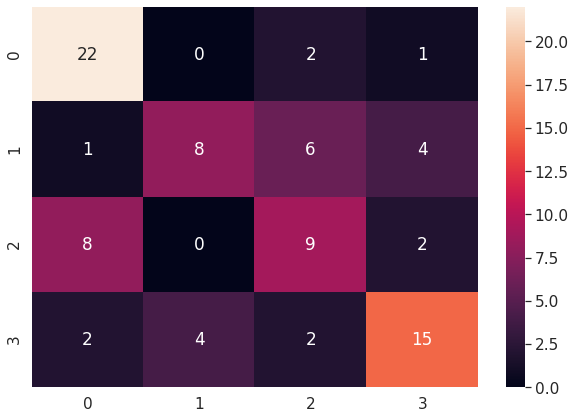

In [139]:
print("Classification report on Test set\n")
gs = LogisticRegression(penalty='l2',C=0.5,random_state=12)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
#print('ROC AUC: ',roc_auc)
cm=metrics.confusion_matrix(y_true,y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm,annot=True)





## 3) Support Vector Machines

Classification report on Test set

Accuracy:  0.628
Recall:  0.628
Precision:  0.621


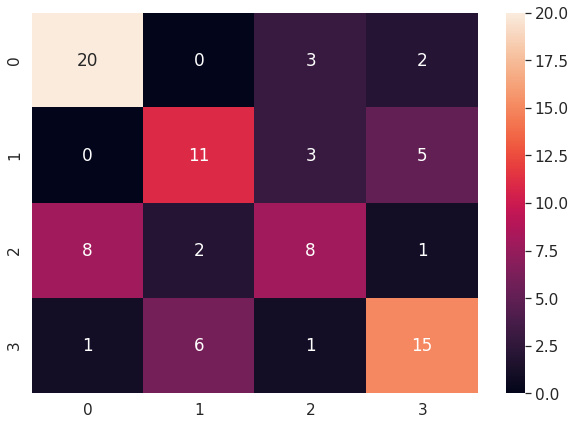

In [143]:
print("Classification report on Test set\n")
gs = SVC(kernel='rbf',C=100,random_state=12)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
#print('ROC AUC: ',roc_auc)
cm=metrics.confusion_matrix(y_true,y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm,annot=True)



In [15]:
svm_model = gs

## 4) Random Forest

In [16]:
params = {'n_estimators':np.linspace(10,150,dtype='int',num=10),'max_depth':np.linspace(2,5,dtype='int'),'criterion':['gini','entropy']}

clf = RandomForestClassifier(n_jobs=-1,random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,verbose=10,n_jobs=-1)

gs=gs.fit(X_train,y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0618s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 388 ta

KeyboardInterrupt: 

In [16]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Best parameters set found : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 134} 

Classification report on Test set

Accuracy:  0.912
Recall:  0.914
Precision:  0.883
ROC AUC:  0.913


## 5) Neural Net

In [144]:
X_train.shape

(256, 10)

In [18]:
import torch
print(torch.cuda.is_available())


ModuleNotFoundError: No module named 'torch'

In [155]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            20, activation="relu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dense(50, activation="softmax"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation="softmax"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_13 (Dense)             (None, 50)                1050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
____________________________________________________

In [156]:
metrics = [
    'accuracy',
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)



history=model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=200,
    validation_data=(X_test, y_test),

)

Epoch 1/200
26/26 [==============================] - 1s 39ms/step - loss: -6.7907 - accuracy: 0.2266 - fn: 0.0000e+00 - fp: 75.0000 - tn: 0.0000e+00 - tp: 181.0000 - precision: 0.7070 - recall: 1.0000 - val_loss: -7.0927 - val_accuracy: 0.2209 - val_fn: 0.0000e+00 - val_fp: 25.0000 - val_tn: 0.0000e+00 - val_tp: 61.0000 - val_precision: 0.7093 - val_recall: 1.0000
Epoch 2/200
26/26 [==============================] - 0s 6ms/step - loss: -6.7907 - accuracy: 0.2266 - fn: 0.0000e+00 - fp: 75.0000 - tn: 0.0000e+00 - tp: 181.0000 - precision: 0.7070 - recall: 1.0000 - val_loss: -7.0927 - val_accuracy: 0.2209 - val_fn: 0.0000e+00 - val_fp: 25.0000 - val_tn: 0.0000e+00 - val_tp: 61.0000 - val_precision: 0.7093 - val_recall: 1.0000
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: -6.7907 - accuracy: 0.2266 - fn: 0.0000e+00 - fp: 75.0000 - tn: 0.0000e+00 - tp: 181.0000 - precision: 0.7070 - recall: 1.0000 - val_loss: -7.0927 - val_accuracy: 0.2209 - val_fn: 0.0000e+00 - v

KeyboardInterrupt: 

dict_keys(['loss', 'accuracy', 'fn', 'fp', 'tn', 'tp', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_fn', 'val_fp', 'val_tn', 'val_tp', 'val_precision', 'val_recall'])


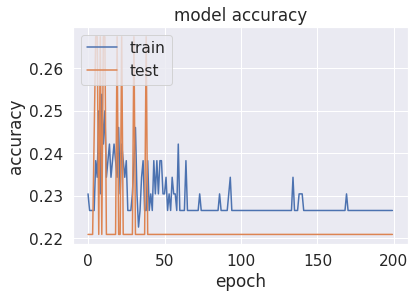

In [147]:
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [150]:
y_true, y_pred = y_test, model.predict_classes(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)


print('Accuracy: ',accuracy)


Accuracy:  0.221
